In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm, colors

# %matplotlib widget

In [54]:
file_dir = "images\\PyTorch_t1010_100858_important_version\\logs\\"
files_list = [f"stats_{i}.csv" for i in range(4, 81, 4)]

# other_files = ["images\\PyTorch_t1020_101016_id1\\logs\\stats.csv", "images\\PyTorch_t1020_101016_id2\\logs\\stats.csv"]
other_files = ["images\\PyTorch_t1020_112815_id1\\logs\\stats.csv", "images\\PyTorch_t1020_112815_id2\\logs\\stats.csv"]

In [47]:
smooth = 500
shift_val = smooth

In [48]:
df_list = []
for ind, file in enumerate(files_list):
    df_list.append(pd.read_csv(file_dir + file))
    df_list[ind]["smoothed_g_loss"] = df_list[ind].g_loss.rolling(smooth, center=True).mean()
    df_list[ind]["smoothed_d_loss"] = df_list[ind].d_loss.rolling(smooth, center=True).mean()
    
df_ng_md = pd.read_csv(other_files[0])
df_ng_md["smoothed_g_loss"] = df_ng_md.g_loss.rolling(smooth, center=True).mean()
df_ng_md["smoothed_d_loss"] = df_ng_md.d_loss.rolling(smooth, center=True).mean()
df_ng_md.batch -= shift_val

df_mg_nd = pd.read_csv(other_files[1])
df_mg_nd["smoothed_g_loss"] = df_mg_nd.g_loss.rolling(smooth, center=True).mean()
df_mg_nd["smoothed_d_loss"] = df_mg_nd.d_loss.rolling(smooth, center=True).mean()
df_mg_nd.batch -= shift_val

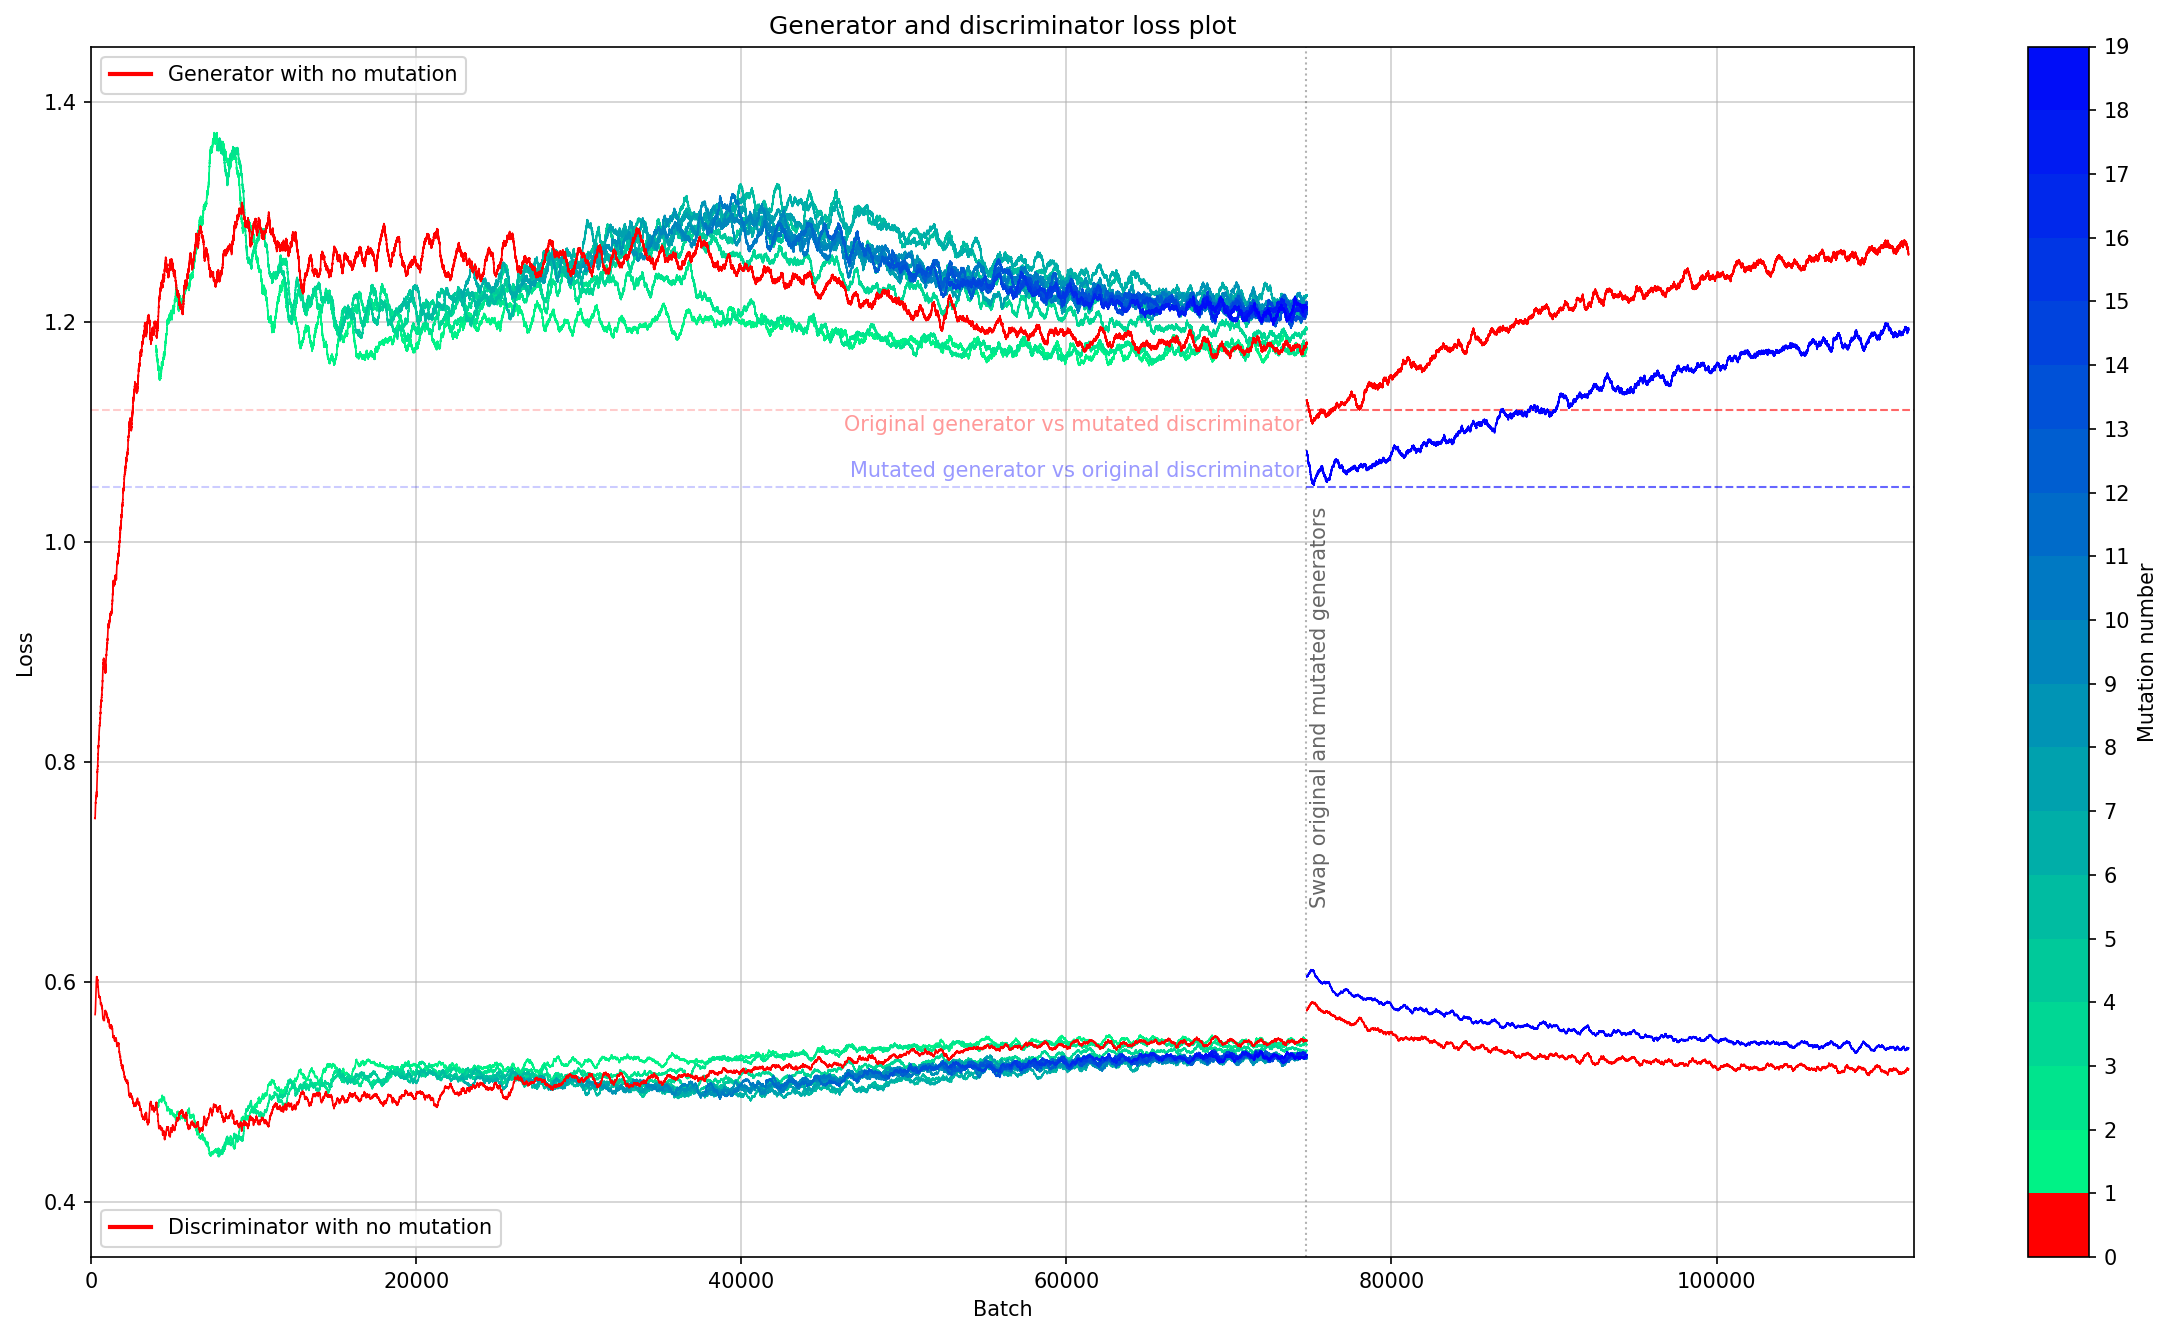

In [61]:
fig_size = {
    "huge":   [16, 9],
    "paper":  [6, 4],
}

# plt.style.use("seaborn-whitegrid")
plt.style.use("default")
plt.rcParams['figure.figsize'] = fig_size["huge"]
plt.rcParams['figure.dpi'] =  150

winter_r_cmap = cm.get_cmap("winter_r", 20)(np.linspace(0, 1, 20))

red_col = np.array(colors.to_rgba('red'))
winter_r_cmap[0, :] = red_col
newcmap = colors.ListedColormap(winter_r_cmap)
color_list = newcmap(np.linspace(0, 1, 20))

lines_g, lines_d = [], []
fig, ax = plt.subplots()
for ind, df in enumerate(df_list[1:]):
    lines_g.append(ax.plot(df.batch, df.smoothed_g_loss, lw=0.8, c=color_list[ind + 1]))
    lines_d.append(ax.plot(df.batch, df.smoothed_d_loss, lw=0.8, c=color_list[ind + 1]))
    
lines_g.append(ax.plot(df_ng_md.batch, df_ng_md.smoothed_g_loss, lw=0.8, c="red"))
lines_d.append(ax.plot(df_ng_md.batch, df_ng_md.smoothed_d_loss, lw=0.8, c="red"))
lines_g.append(ax.plot(df_mg_nd.batch, df_mg_nd.smoothed_g_loss, lw=0.8, c=color_list[-1]))
lines_d.append(ax.plot(df_mg_nd.batch, df_mg_nd.smoothed_d_loss, lw=0.8, c=color_list[-1]))

lines_g.insert(0, ax.plot(df_list[0].batch, df_list[0].smoothed_g_loss, label="Generator with no mutation", lw=0.8, c=color_list[0]))
lines_d.insert(0, ax.plot(df_list[0].batch, df_list[0].smoothed_d_loss, label="Discriminator with no mutation", lw=0.8, c=color_list[0]))
    
first_legend = ax.legend(handles=lines_g[0], loc='upper left')
fig.gca().add_artist(first_legend)
second_legend = ax.legend(handles=lines_d[0], loc='lower left')

for legobj in first_legend.legendHandles:
    legobj.set_linewidth(2.0)
for legobj in second_legend.legendHandles:
    legobj.set_linewidth(2.0)

norm = colors.Normalize(vmin=0, vmax=20)
bounds = np.linspace(0, 19, 20)
clb = plt.colorbar(cm.ScalarMappable(norm=norm, cmap=newcmap),
                   ticks=bounds, boundaries=bounds)
clb.set_label("Mutation number")
ax.hlines(y=1.12, 
          xmin=0, 
          xmax=74740,
          color="red", alpha=0.2,
          linestyle='--', linewidth=1
         )
ax.hlines(y=1.05, 
          xmin=0, 
          xmax=74740,
          color=color_list[-1], alpha=0.2,
          linestyle='--', linewidth=1
         )
ax.hlines(y=1.12, 
          xmin=74740, 
          xmax=112160,
          color="red", alpha=0.6,
          linestyle='--', linewidth=1
         )
ax.hlines(y=1.05, 
          xmin=74740, 
          xmax=112160,
          color=color_list[-1], alpha=0.6,
          linestyle='--', linewidth=1
         )
ax.vlines(x=74740, 
          ymin=0.35,  
          ymax=1.45,
          color="k", alpha=0.3,
          linestyle=':', linewidth=1
         )
ax.annotate(text='Original generator vs mutated discriminator',
            xy=(112160, 1.12),
            xytext=(74600, 1.115),
            color="red",
            alpha=0.4,
            horizontalalignment="right",
            verticalalignment="top"
           )
ax.annotate(text='Mutated generator vs original discriminator',
            xy=(112160, 1.05),
            xytext=(74600, 1.055),
            color=color_list[-1],
            alpha=0.4,
            horizontalalignment="right",
            verticalalignment="bottom"
           )
ax.annotate(text='Swap original and mutated generators',
            xy=(74740, 0.85),
            xytext=(75000, 0.85),
            color="black",
            alpha=0.6,
            horizontalalignment="left",
            verticalalignment="center",
            rotation=90,
           )
ax.set_title("Generator and discriminator loss plot")
ax.set_ylabel("Loss")
ax.set_xlabel("Batch")

ax.grid(True, which='major', alpha=0.6)
ax.set_xlim(0, 112160)
ax.set_ylim(0.35, 1.45)

fig.tight_layout()

plt.savefig("plot_5.png", dpi=300)
None

In [24]:
len(df_list[0]) + len(df_mg_nd), len(df_list[0]), len(df_mg_nd)

(112560, 75040, 37520)